In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec
from scipy.io import loadmat

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [4]:
tau_x_z0_1_mod = xr.open_dataset(input_path + 'tau_x_z0_1_mod.nc').tau_x_z0_1_mod
print(tau_x_z0_1_mod)
tau_x_z0_1_slope_mod = xr.open_dataset(input_path + 'tau_x_z0_1_slope_mod.nc').tau_x_z0_1_slope_mod*10
print(tau_x_z0_1_slope_mod)
tau_x_z0_1_p_value_mod = xr.open_dataset(input_path + 'tau_x_z0_1_p_value_mod.nc').tau_x_z0_1_p_value_mod
print(tau_x_z0_1_p_value_mod)
tau_x_z0_1_std_err_mod = xr.open_dataset(input_path + 'tau_x_z0_1_std_err_mod.nc').tau_x_z0_1_std_err_mod*10
print(tau_x_z0_1_std_err_mod)

tau_x_z0_025_mod = xr.open_dataset(input_path + 'tau_x_z0_025_mod.nc').tau_x_z0_025_mod
print(tau_x_z0_025_mod)
tau_x_z0_025_slope_mod = xr.open_dataset(input_path + 'tau_x_z0_025_slope_mod.nc').tau_x_z0_025_slope_mod*10
print(tau_x_z0_025_slope_mod)
tau_x_z0_025_p_value_mod = xr.open_dataset(input_path + 'tau_x_z0_025_p_value_mod.nc').tau_x_z0_025_p_value_mod
print(tau_x_z0_025_p_value_mod)
tau_x_z0_025_std_err_mod = xr.open_dataset(input_path + 'tau_x_z0_025_std_err_mod.nc').tau_x_z0_025_std_err_mod*10
print(tau_x_z0_025_std_err_mod)

tau_x_z0_01_mod = xr.open_dataset(input_path + 'tau_x_z0_01_mod.nc').tau_x_z0_01_mod
print(tau_x_z0_01_mod)
tau_x_z0_01_slope_mod = xr.open_dataset(input_path + 'tau_x_z0_01_slope_mod.nc').tau_x_z0_01_slope_mod*10
print(tau_x_z0_01_slope_mod)
tau_x_z0_01_p_value_mod = xr.open_dataset(input_path + 'tau_x_z0_01_p_value_mod.nc').tau_x_z0_01_p_value_mod
print(tau_x_z0_01_p_value_mod)
tau_x_z0_01_std_err_mod = xr.open_dataset(input_path + 'tau_x_z0_01_std_err_mod.nc').tau_x_z0_01_std_err_mod*10
print(tau_x_z0_01_std_err_mod)

<xarray.DataArray 'tau_x_z0_1_mod' (yu_ocean: 101, xu_ocean: 151, year: 25)>
[381275 values with dtype=float32]
Coordinates:
  * yu_ocean  (yu_ocean) float64 -77.75 -77.75 -77.75 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 140.0 141.0 142.0 143.0 ... 288.0 289.0 290.0
  * year      (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'tau_x_z0_1_slope_mod' (yu_ocean: 101, xu_ocean: 151)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.00114094, -0.00155224, -0.00179845, ...,         nan,
                nan,         nan],
       [-0.00082458, -0.00109905, -0.00130999, ...,         nan,
                nan,         nan],
       [-0.00024085, -0.00033884, -0.00050818, ...,   

In [5]:
tau_y_z0_1_mod = xr.open_dataset(input_path + 'tau_y_z0_1_mod.nc').tau_y_z0_1_mod
print(tau_y_z0_1_mod)
tau_y_z0_1_slope_mod = xr.open_dataset(input_path + 'tau_y_z0_1_slope_mod.nc').tau_y_z0_1_slope_mod*10
print(tau_y_z0_1_slope_mod)
tau_y_z0_1_p_value_mod = xr.open_dataset(input_path + 'tau_y_z0_1_p_value_mod.nc').tau_y_z0_1_p_value_mod
print(tau_y_z0_1_p_value_mod)
tau_y_z0_1_std_err_mod = xr.open_dataset(input_path + 'tau_y_z0_1_std_err_mod.nc').tau_y_z0_1_std_err_mod*10
print(tau_y_z0_1_std_err_mod)

tau_y_z0_025_mod = xr.open_dataset(input_path + 'tau_y_z0_025_mod.nc').tau_y_z0_025_mod
print(tau_y_z0_025_mod)
tau_y_z0_025_slope_mod = xr.open_dataset(input_path + 'tau_y_z0_025_slope_mod.nc').tau_y_z0_025_slope_mod*10
print(tau_y_z0_025_slope_mod)
tau_y_z0_025_p_value_mod = xr.open_dataset(input_path + 'tau_y_z0_025_p_value_mod.nc').tau_y_z0_025_p_value_mod
print(tau_y_z0_025_p_value_mod)
tau_y_z0_025_std_err_mod = xr.open_dataset(input_path + 'tau_y_z0_025_std_err_mod.nc').tau_y_z0_025_std_err_mod*10
print(tau_y_z0_025_std_err_mod)

tau_y_z0_01_mod = xr.open_dataset(input_path + 'tau_y_z0_01_mod.nc').tau_y_z0_01_mod
print(tau_y_z0_01_mod)
tau_y_z0_01_slope_mod = xr.open_dataset(input_path + 'tau_y_z0_01_slope_mod.nc').tau_y_z0_01_slope_mod*10
print(tau_y_z0_01_slope_mod)
tau_y_z0_01_p_value_mod = xr.open_dataset(input_path + 'tau_y_z0_01_p_value_mod.nc').tau_y_z0_01_p_value_mod
print(tau_y_z0_01_p_value_mod)
tau_y_z0_01_std_err_mod = xr.open_dataset(input_path + 'tau_y_z0_01_std_err_mod.nc').tau_y_z0_01_std_err_mod*10
print(tau_y_z0_01_std_err_mod)

<xarray.DataArray 'tau_y_z0_1_mod' (yu_ocean: 101, xu_ocean: 151, year: 25)>
[381275 values with dtype=float32]
Coordinates:
  * yu_ocean  (yu_ocean) float64 -77.75 -77.75 -77.75 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 140.0 141.0 142.0 143.0 ... 288.0 289.0 290.0
  * year      (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'tau_y_z0_1_slope_mod' (yu_ocean: 101, xu_ocean: 151)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.00161263, -0.00115048, -0.00090967, ...,         nan,
                nan,         nan],
       [-0.00154056, -0.00093106, -0.00060639, ...,         nan,
                nan,         nan],
       [-0.00155064, -0.00077467, -0.00028963, ...,   

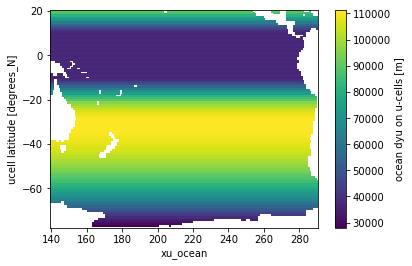

In [40]:
latS = -80
latN = 20
lonW = 140-360
lonE = 290-360

dxu_z0_1_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1/output059/ocean/ocean_grid.nc').\
dxu.\
sel(yu_ocean=arange(latS,latN,1), method='nearest').\
sel(xu_ocean=arange(lonW,lonE,1), method='nearest')
xu_ocean = dxu_z0_1_mod.xu_ocean
xu_ocean_corrected = xu_ocean + 360
dxu_z0_1_mod = dxu_z0_1_mod.assign_coords(xu_ocean=xu_ocean_corrected)

dyu_z0_1_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spinup1_B1/output059/ocean/ocean_grid.nc').\
dyu.\
sel(yu_ocean=arange(latS,latN,1), method='nearest').\
sel(xu_ocean=arange(lonW,lonE,1), method='nearest')
xu_ocean = dyu_z0_1_mod.xu_ocean
xu_ocean_corrected = xu_ocean + 360
dyu_z0_1_mod = dyu_z0_1_mod.assign_coords(xu_ocean=xu_ocean_corrected)

dyu_z0_1_mod.plot()

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  """


(25, 101, 151)
lat_1_mod -77.7531683885388
lat_1_mod -77.7531683885388
lat_1_mod -77.7531683885388
lat_1_mod -77.00641259100644
lat_1_mod -75.9729647525201
lat_1_mod -74.86085534808328
lat_1_mod -73.95296132370986
lat_1_mod -72.96570939923888
lat_1_mod -71.885889076368
lat_1_mod -71.10867977935483
lat_1_mod -69.84906491784008
lat_1_mod -68.94283782351798
lat_1_mod -67.98072752895108
lat_1_mod -66.96083978225538
lat_1_mod -65.88166483095814
lat_1_mod -64.74208746915161
lat_1_mod -64.14940914737063
lat_1_mod -62.918017835627595
lat_1_mod -62.27927927724076
lat_1_mod -60.95584415500419
lat_1_mod -60.27127522056853
lat_1_mod -58.85694367835927
lat_1_mod -58.12745998812029
lat_1_mod -56.62473949913835
lat_1_mod -55.85192873260888
lat_1_mod -55.06514135034383
lat_1_mod -54.26464933342449
lat_1_mod -52.623752879356864
lat_1_mod -51.7840044546795
lat_1_mod -50.931862328421644
lat_1_mod -50.067707258186175
lat_1_mod -49.19193999593566
lat_1_mod -48.304980620980295
lat_1_mod -47.40726784079731
l

(array([1.09300e+03, 4.44040e+04, 6.67010e+04, 1.46795e+05, 6.59600e+04,
        4.40100e+03, 8.97000e+02, 2.18000e+02, 9.30000e+01, 1.30000e+01]),
 array([-4.2376741e-06, -2.9161158e-06, -1.5945574e-06, -2.7299902e-07,
         1.0485594e-06,  2.3701177e-06,  3.6916761e-06,  5.0132344e-06,
         6.3347929e-06,  7.6563510e-06,  8.9779096e-06], dtype=float32),
 <a list of 10 Patch objects>)

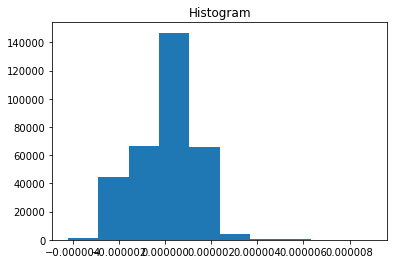

In [55]:
tau_y_dxu = tau_y_z0_1_mod / dxu_z0_1_mod
tau_x_dyu = tau_x_z0_1_mod / dyu_z0_1_mod
wind_curl_1_mod = tau_y_dxu - tau_x_dyu

year = wind_curl_1_mod.year
lat_1_mod = wind_curl_1_mod.yu_ocean
lon_1_mod = wind_curl_1_mod.xu_ocean

wind_curl_1_trans_mod = wind_curl_1_mod.transpose('year','yu_ocean','xu_ocean')
print(np.shape(wind_curl_1_trans_mod))
wind_curl_1_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='wind_curl_1')
wind_curl_1_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='wind_curl_1')
wind_curl_1_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_1_mod)[0], np.shape(lon_1_mod)[0]]), dims=(
    'lat_1', 'lon_1'), coords=[lat_1_mod, lon_1_mod], name='wind_curl_1')
for iid, i in enumerate(lat_1_mod):
    for jid, j in enumerate(lon_1_mod):
        wind_curl_1_slope_mod[iid, jid], _, _, wind_curl_1_p_value_mod[iid, jid], wind_curl_1_std_err_mod[iid, jid] = \
        stats.linregress(year, wind_curl_1_trans_mod[:, iid, jid])
    print('lat_1_mod ' + str(np.array(i)))
print(wind_curl_1_slope_mod)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.


(25, 101, 151)
lat_025_mod -79.96821564718513
lat_025_mod -79.01782834434088
lat_025_mod -77.96184245229172
lat_025_mod -77.01145514944747
lat_025_mod -75.9554692573983
lat_025_mod -75.00508195455406
lat_025_mod -73.94909606250489
lat_025_mod -72.99870875966064
lat_025_mod -72.0483214568164
lat_025_mod -70.99233556476723
lat_025_mod -70.04194826192298
lat_025_mod -68.98596236987382
lat_025_mod -68.03557506702957
lat_025_mod -66.9795891749804
lat_025_mod -66.02920187213616
lat_025_mod -64.9731343584332
lat_025_mod -64.00419801547245
lat_025_mod -63.000453214324764
lat_025_mod -61.960968741022334
lat_025_mod -61.00623630265623
lat_025_mod -60.02190673823756
lat_025_mod -59.00736214040289
lat_025_mod -57.96200298543457
lat_025_mod -57.02158171167255
lat_025_mod -56.05675532004928
lat_025_mod -55.06717120897921
lat_025_mod -54.052496893222745
lat_025_mod -53.012422566369025
lat_025_mod -51.94666372937093
lat_025_mod -51.0125182145253
lat_025_mod -50.059170111641855
lat_025_mod -48.92249454

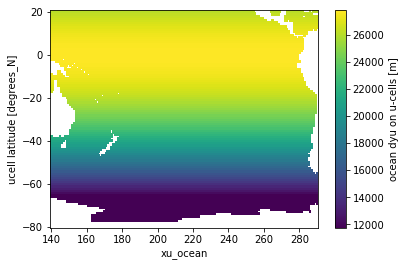

In [64]:
dxu_z0_025_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf_gmredi6/output153/ocean/ocean_grid.nc').\
dxu.\
sel(yu_ocean=arange(latS,latN,1), method='nearest').\
sel(xu_ocean=arange(lonW,lonE,1), method='nearest')
xu_ocean = dxu_z0_025_mod.xu_ocean
xu_ocean_corrected = xu_ocean + 360
dxu_z0_025_mod = dxu_z0_025_mod.assign_coords(xu_ocean=xu_ocean_corrected)

dyu_z0_025_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_iaf_gmredi6/output153/ocean/ocean_grid.nc').\
dyu.\
sel(yu_ocean=arange(latS,latN,1), method='nearest').\
sel(xu_ocean=arange(lonW,lonE,1), method='nearest')
xu_ocean = dyu_z0_025_mod.xu_ocean
xu_ocean_corrected = xu_ocean + 360
dyu_z0_025_mod = dyu_z0_025_mod.assign_coords(xu_ocean=xu_ocean_corrected)

dyu_z0_025_mod.plot()

tau_y_dxu = tau_y_z0_025_mod / dxu_z0_025_mod
tau_x_dyu = tau_x_z0_025_mod / dyu_z0_025_mod
wind_curl_025_mod = tau_y_dxu - tau_x_dyu

year = wind_curl_025_mod.year
lat_025_mod = wind_curl_025_mod.yu_ocean
lon_025_mod = wind_curl_025_mod.xu_ocean

wind_curl_025_trans_mod = wind_curl_025_mod.transpose('year','yu_ocean','xu_ocean')
print(np.shape(wind_curl_025_trans_mod))
wind_curl_025_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_025_mod)[0], np.shape(lon_025_mod)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025_mod, lon_025_mod], name='wind_curl_025')
wind_curl_025_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_025_mod)[0], np.shape(lon_025_mod)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025_mod, lon_025_mod], name='wind_curl_025')
wind_curl_025_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_025_mod)[0], np.shape(lon_025_mod)[0]]), dims=(
    'lat_025', 'lon_025'), coords=[lat_025_mod, lon_025_mod], name='wind_curl_025')
for iid, i in enumerate(lat_025_mod):
    for jid, j in enumerate(lon_025_mod):
        wind_curl_025_slope_mod[iid, jid], _, _, wind_curl_025_p_value_mod[iid, jid], wind_curl_025_std_err_mod[iid, jid] = \
        stats.linregress(year, wind_curl_025_trans_mod[:, iid, jid])
    print('lat_025_mod ' + str(np.array(i)))
print(wind_curl_025_slope_mod)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.


(25, 101, 151)
lat_01_mod -79.98928878727199
lat_01_mod -79.01778363652085
lat_01_mod -78.00403913138922
lat_01_mod -76.9902946262576
lat_01_mod -76.01878947550645
lat_01_mod -75.00504497037483
lat_01_mod -73.9913004652432
lat_01_mod -73.01979531449206
lat_01_mod -72.00605080936043
lat_01_mod -70.9923063042288
lat_01_mod -70.02080115347766
lat_01_mod -69.00705664834604
lat_01_mod -67.99331214321441
lat_01_mod -66.97956763808278
lat_01_mod -66.00806248733164
lat_01_mod -64.99430220674928
lat_01_mod -64.0042209455608
lat_01_mod -62.97776694305129
lat_01_mod -62.007960199967066
lat_01_mod -61.00625549764092
lat_01_mod -60.02192466827543
lat_01_mod -59.007378755945275
lat_01_mod -58.01502712478788
lat_01_mod -56.99436964151279
lat_01_mod -56.000890558457534
lat_01_mod -54.98119819398587
lat_01_mod -53.99376127037148
lat_01_mod -52.98233889038113
lat_01_mod -52.008268394713866
lat_01_mod -51.012524640214004
lat_01_mod -49.994932844070924
lat_01_mod -49.02096313942841
lat_01_mod -48.02755332

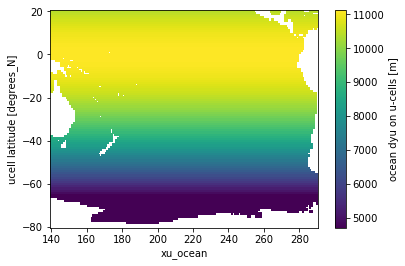

In [75]:
dxu_z0_01_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output197/ocean/ocean_grid.nc').\
dxu.\
sel(yu_ocean=arange(latS,latN,1), method='nearest').\
sel(xu_ocean=arange(lonW,lonE,1), method='nearest')
xu_ocean = dxu_z0_01_mod.xu_ocean
xu_ocean_corrected = xu_ocean + 360
dxu_z0_01_mod = dxu_z0_01_mod.assign_coords(xu_ocean=xu_ocean_corrected)

dyu_z0_01_mod = xr.open_dataset(
    '/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55v13_iaf/output197/ocean/ocean_grid.nc').\
dyu.\
sel(yu_ocean=arange(latS,latN,1), method='nearest').\
sel(xu_ocean=arange(lonW,lonE,1), method='nearest')
xu_ocean = dyu_z0_01_mod.xu_ocean
xu_ocean_corrected = xu_ocean + 360
dyu_z0_01_mod = dyu_z0_01_mod.assign_coords(xu_ocean=xu_ocean_corrected)

dyu_z0_01_mod.plot()

tau_y_dxu = tau_y_z0_01_mod / dxu_z0_01_mod
tau_x_dyu = tau_x_z0_01_mod / dyu_z0_01_mod
wind_curl_01_mod = tau_y_dxu - tau_x_dyu

year = wind_curl_01_mod.year
lat_01_mod = wind_curl_01_mod.yu_ocean
lon_01_mod = wind_curl_01_mod.xu_ocean

wind_curl_01_trans_mod = wind_curl_01_mod.transpose('year','yu_ocean','xu_ocean')
print(np.shape(wind_curl_01_trans_mod))
wind_curl_01_slope_mod = xr.DataArray(
    np.zeros([np.shape(lat_01_mod)[0], np.shape(lon_01_mod)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01_mod, lon_01_mod], name='wind_curl_01')
wind_curl_01_p_value_mod = xr.DataArray(
    np.zeros([np.shape(lat_01_mod)[0], np.shape(lon_01_mod)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01_mod, lon_01_mod], name='wind_curl_01')
wind_curl_01_std_err_mod = xr.DataArray(
    np.zeros([np.shape(lat_01_mod)[0], np.shape(lon_01_mod)[0]]), dims=(
    'lat_01', 'lon_01'), coords=[lat_01_mod, lon_01_mod], name='wind_curl_01')
for iid, i in enumerate(lat_01_mod):
    for jid, j in enumerate(lon_01_mod):
        wind_curl_01_slope_mod[iid, jid], _, _, wind_curl_01_p_value_mod[iid, jid], wind_curl_01_std_err_mod[iid, jid] = \
        stats.linregress(year, wind_curl_01_trans_mod[:, iid, jid])
    print('lat_01_mod ' + str(np.array(i)))
print(wind_curl_01_slope_mod)

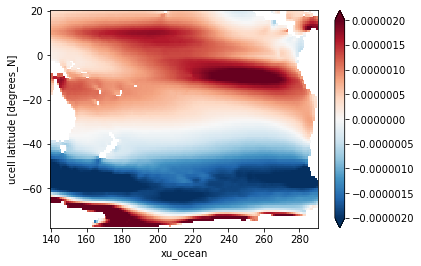

In [84]:
wind_curl_1_mod.mean('year').plot(vmax=0.000002)

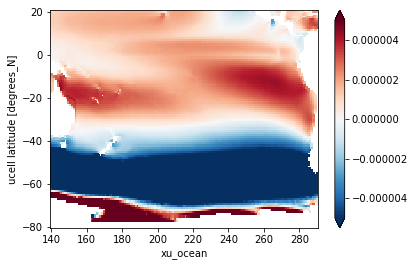

In [88]:
wind_curl_025_mod.mean('year').plot(vmax=0.000005)

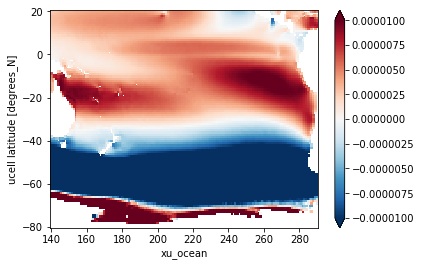

In [90]:
wind_curl_01_mod.mean('year').plot(vmax=0.00001)

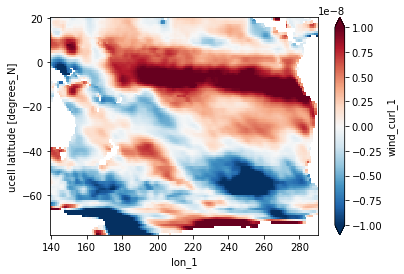

In [74]:
wind_curl_1_slope_mod.plot(vmax=0.00000001)

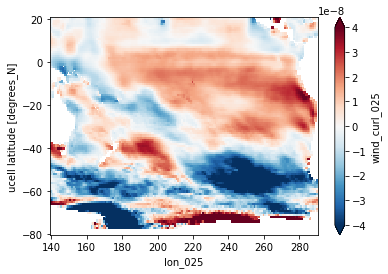

In [72]:
wind_curl_025_slope_mod.plot(vmax=0.00000004)

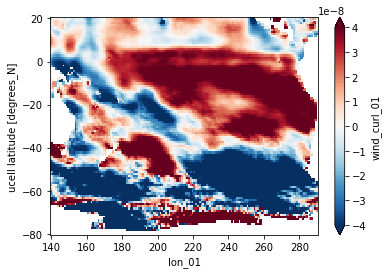

In [77]:
wind_curl_01_slope_mod.plot(vmax=0.00000004)

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.47727272727272724, y1=0.88)
[0.125, 0.48681818181818187, 0.5272727272727272, 0.88]
Bbox(x0=0.5477272727272726, y0=0.5368181818181819, x1=0.8999999999999999, y1=0.88)
[0.5477272727272726, 0.48681818181818187, 0.95, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.47727272727272724, y1=0.46818181818181825)
[0.125, 0.07500000000000011, 0.5272727272727272, 0.46818181818181825]


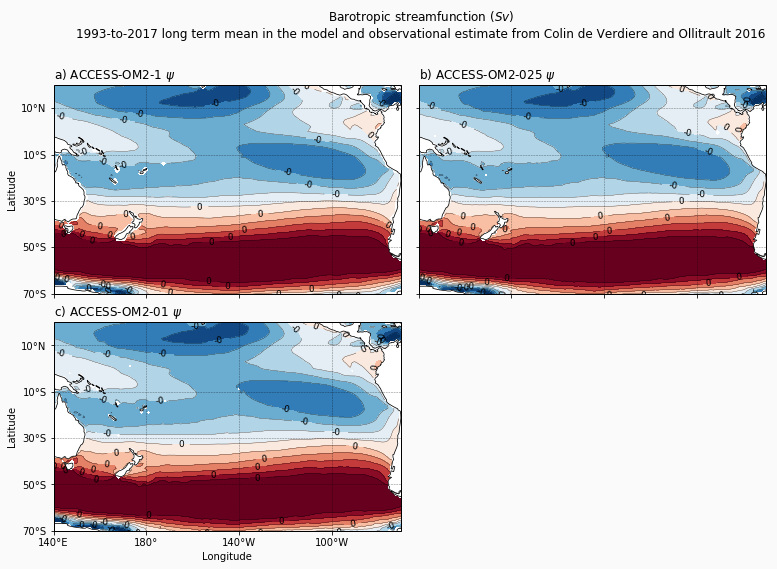

In [95]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Barotropic streamfunction ($Sv$)' +
    '\n1993-to-2017 long term mean in the model and observational estimate from Colin de Verdiere and Ollitrault 2016',
    x=0.55,y=1, ha='center')

row=2
col=2

central_longitude = 140

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-0.1,0.1,0.02)
cmap = plt.cm.RdBu_r
data = tau_x_z0_1_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = tau_x_z0_025_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-50,50,5)
cmap = plt.cm.RdBu_r
data = tau_x_z0_01_mod.mean('year')
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 $\psi$', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree(central_longitude=central_longitude))
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
# print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
# data = psi3
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
#                        transform=ccrs.PlateCarree())
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
# ax.set_position(bbox(pos_plot))
# ax.set_title('d) Observations $\psi$', loc='left')
# ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)
# axins = inset_axes(ax,
#                    width="3%",  # width = 5% of parent_bbox width
#                    height="100%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.03, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'$\psi$ ($Sv$)', cax=axins)

# savefigure('psi_absolute2')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.47727272727272724, y1=0.88)
[0.125, 0.48681818181818187, 0.5272727272727272, 0.88]
Bbox(x0=0.5477272727272726, y0=0.5368181818181819, x1=0.8999999999999999, y1=0.88)
[0.5477272727272726, 0.48681818181818187, 0.95, 0.88]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.47727272727272724, y1=0.46818181818181825)
[0.125, 0.07500000000000011, 0.5272727272727272, 0.46818181818181825]


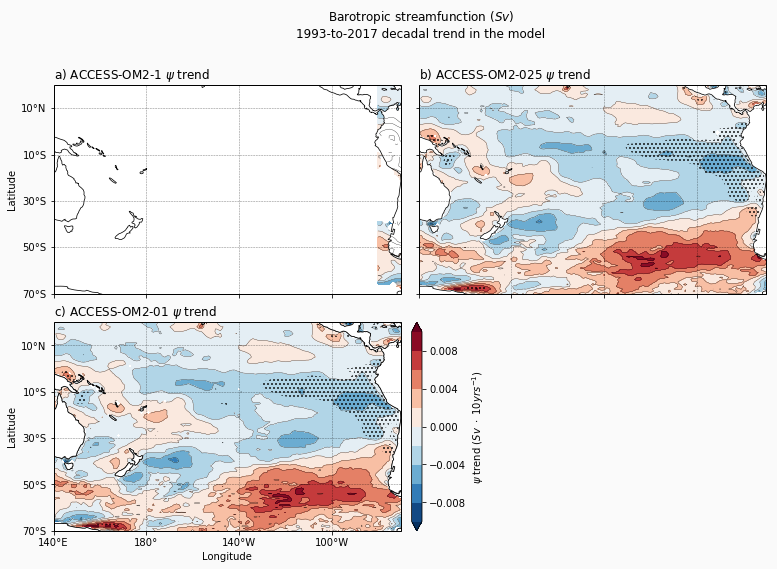

In [155]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Barotropic streamfunction ($Sv$)' +
    '\n1993-to-2017 decadal trend in the model',
    x=0.55,y=1, ha='center')

row=2
col=2

central_longitude = 140

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
levels=arange(-0.01,0.01,0.002)
cmap = plt.cm.RdBu_r
data = tau_x_z0_1_slope_mod
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both')
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-')
# plt.quiver(data.xu_ocean, 
#            data.yu_ocean, 
#            tau_x_z0_1_slope_mod, 
#            tau_y_z0_1_slope_mod)
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tau_x_z0_1_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yu_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 $\psi$ trend', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
data = tau_x_z0_025_slope_mod
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tau_x_z0_025_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yu_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 $\psi$ trend', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree(central_longitude=central_longitude))
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
print(pos_plot)
# levels=arange(-20,20,2)
# cmap = plt.cm.RdBu_r
data = tau_x_z0_01_slope_mod
plot = plt.contourf(data.xu_ocean, data.yu_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
                       transform=ccrs.PlateCarree())
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = tau_x_z0_01_p_value_mod
plot2 = plt.contourf(data.xu_ocean, data.yu_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 $\psi$ trend', loc='left')
ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


# ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree(central_longitude=central_longitude))
# pos = ax.get_position()
# print(pos)
# pos_plot = [pos.x0, pos.y0-0.05, pos.x1+0.05, pos.y1]
# print(pos_plot)
# levels=arange(-50,50,5)
# cmap = plt.cm.RdBu_r
# data = psi3
# plot = plt.contourf(data.lon, data.lat, data,
#             cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
# cs = data.plot.contour(levels=levels, linewidths=0.3, colors='k', linestyles='-', 
#                        transform=ccrs.PlateCarree())
# plt.clabel(cs, levels=cs.levels, fmt='%1.0f', fontsize=9)
# ax.set_position(bbox(pos_plot))
# ax.set_title('d) Observations $\psi$', loc='left')
# ax.set_extent([140, 290, -70, 20], crs=ccrs.PlateCarree())
# ax.set_xticks(arange(140, 290, 40), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# # ax.set_xticklabels('')
# ax.set_ylabel('')
# ax.set_yticklabels('')
# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="3%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.03, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$\psi$ trend ($Sv\ \cdot\ 10yrs^{-1}$)', cax=axins)

# savefigure('psi_trend')

In [121]:
tau_x_z0_1_slope_mod.roll(xu_ocean=100)

<xarray.DataArray 'tau_x_z0_1_slope_mod' (yu_ocean: 101, xu_ocean: 151)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [ 5.03807687e-05,  3.03064057e-04,  5.24781702e-04, ...,
        -7.08511558e-04, -4.01276894e-04, -2.45551937e-04],
       [-2.35832597e-04,  1.03877657e-04,  3.95854104e-04, ...,
        -1.05320565e-03, -7.69985496e-04, -5.46713001e-04],
       [-3.47984296e-04, -4.73420780e-05,  2.78942488e-04, ...,
        -1.21402460e-03, -9.30199314e-04, -6.68560914e-04]])
Coordinates:
  * yu_ocean  (yu_ocean) float64 -77.75 -77.75 -77.75 ... 18.22 18.97 19.76
  * xu_ocean  (xu_ocean) float64 191.0 192.0 193.0 194.0 ... 188.0 189.0 190.0

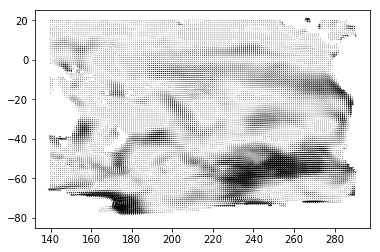

In [138]:
plt.quiver(data.xu_ocean, 
           data.yu_ocean, 
           tau_x_z0_1_slope_mod, 
           tau_y_z0_1_slope_mod)